# Análise de PERT/CPM
Este notebook realiza uma análise de PERT/CPM baseada no projeto descrito, considerando as atividades, dependências e durações fornecidas.

## Objetivos
- Determinar o caminho crítico.
- Calcular os tempos de início e término (mais cedo e mais tarde).
- Gerar gráficos para visualizar o progresso.


In [ ]:
# Importar as bibliotecas necessárias

# Pandas: Utilizado para manipulação e análise de dados em tabelas (DataFrames)
import pandas as pd

# NetworkX: Utilizado para criar, manipular e analisar grafos (redes de atividades)
import networkx as nx

# Matplotlib: Utilizado para visualização gráfica dos dados e redes
import matplotlib.pyplot as plt

# NumPy: Utilizado para operações matemáticas e numéricas avançadas, como manipulação de arrays
import numpy as np


## Carregar Dados do Projeto
O arquivo CSV contém as informações das atividades, dependências e durações estimadas.

In [89]:
# Carregar dados do CSV
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Exibir o DataFrame
data


,Atividade,Descrição,Atividades Precedentes,Duração Estimada
0,Início,Início,None,0
1,A,Escavação,Início,2
2,B,Fundação,A,4
3,C,Paredes,B,10
4,D,Telhado,C,6
5,E,Encanamento Exterior,C,4
6,F,Encanamento Interior,E,5
7,G,Muros,D,7
8,H,Pintura Exterior,"E,G",9
9,I,Instalação Elétrica,C,7


## Criar o Grafo do Projeto
A partir das dependências, construímos um grafo dirigido para representar as relações entre as atividades.

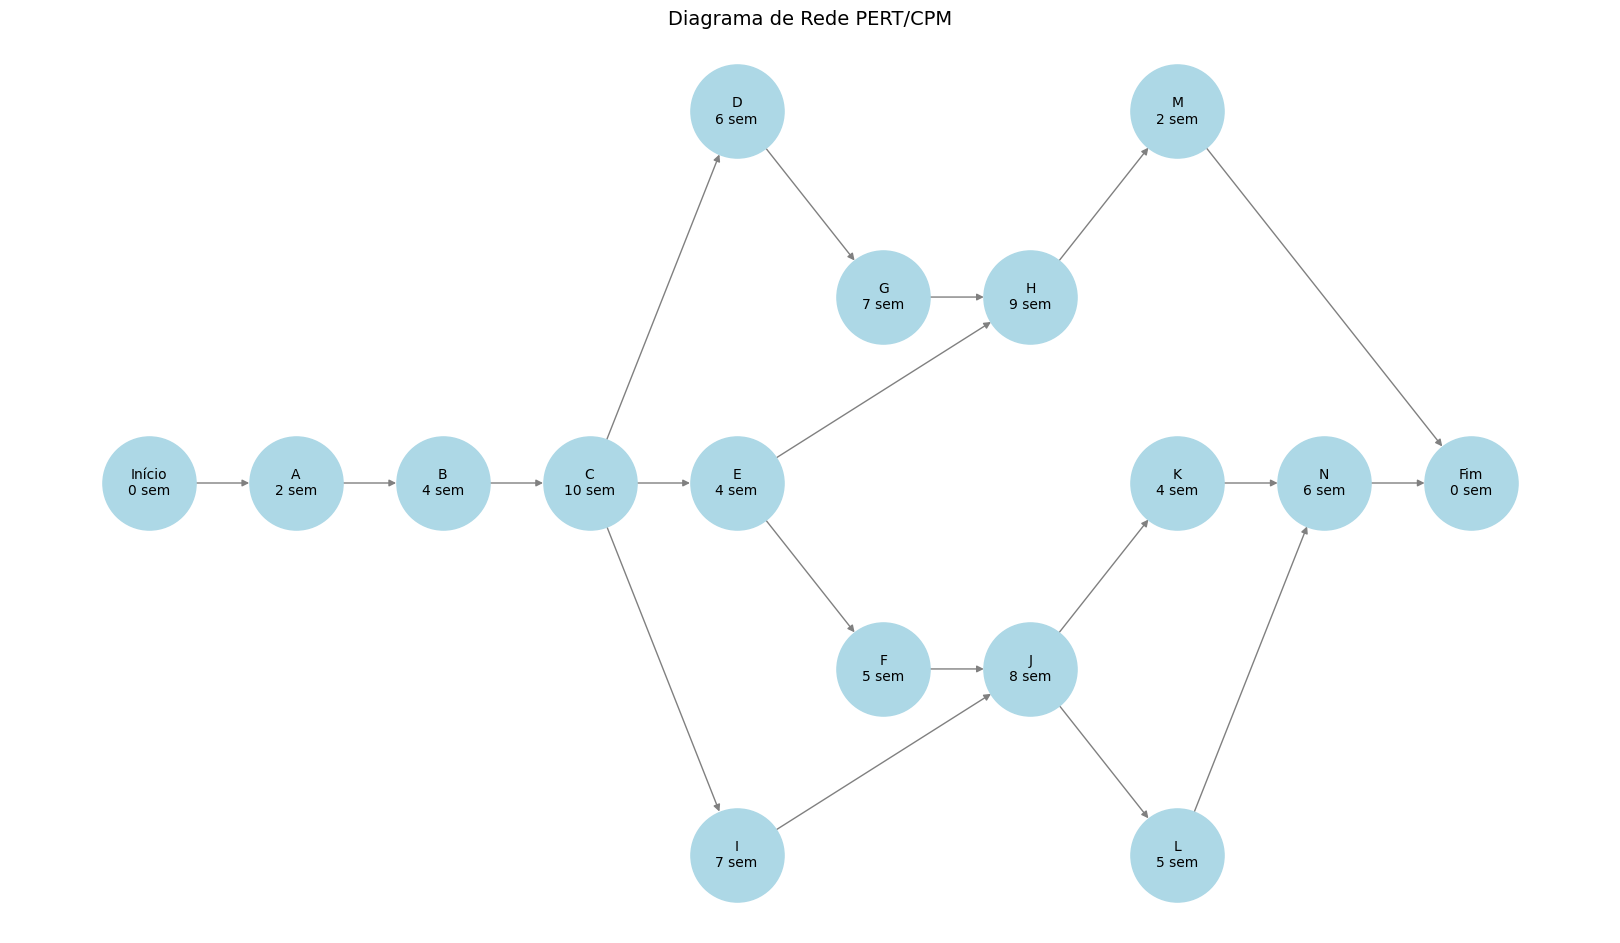

In [90]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt  # Usada para criar gráficos, neste caso, para visualizar o grafo
import networkx as nx  # Biblioteca para manipulação de grafos, necessária para o modelo PERT/CPM
import pandas as pd  # Usada para criar e manipular DataFrames, onde armazenamos os dados das atividades

# Exemplo de DataFrame contendo as informações do projeto
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],  # Identificadores das atividades
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],  # Descrição de cada atividade
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],  # Dependências entre atividades
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]  # Duração estimada para cada atividade
})

# Criar um grafo direcionado para modelar as atividades
G = nx.DiGraph()  # Grafo direcionado (DiGraph), onde as arestas têm direção

# Adicionar nós e arestas ao grafo com base nos dados do DataFrame
for i, row in data.iterrows():  # Iterar sobre as linhas do DataFrame
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])  # Adicionar nó para cada atividade, com atributo de duração
    if row['Atividades Precedentes']:  # Verificar se a atividade tem predecessores
        precedentes = row['Atividades Precedentes'].split(',')  # Dividir as atividades precedentes (caso haja mais de uma)
        for p in precedentes:  # Para cada atividade predecessora
            G.add_edge(p.strip(), row['Atividade'])  # Adicionar uma aresta entre a atividade predecessora e a atividade atual

# Função para calcular os níveis das atividades (hierarquia top-down)
def calculate_levels(graph):
    levels = {}  # Dicionário para armazenar o nível de cada atividade
    for node in nx.topological_sort(graph):  # Realiza uma ordenação topológica das atividades
        if len(list(graph.predecessors(node))) == 0:  # Se a atividade não tem predecessores (como "Início")
            levels[node] = 0  # Atribui nível 0
        else:
            # Atribui o nível como o maior nível entre os predecessores + 1
            levels[node] = max([levels[p] for p in graph.predecessors(node)]) + 1
    return levels  # Retorna o dicionário de níveis das atividades

# Calcular os níveis das atividades no grafo
levels = calculate_levels(G)

# Atribuir os níveis calculados como atributos dos nós no grafo
nx.set_node_attributes(G, levels, "subset")

# Calcular o layout para os nós, ajustando o espaçamento entre eles
pos = nx.multipartite_layout(G, subset_key="subset")  # Layout multipartite, baseado nos níveis (subsets)
vertical_spacing = 2.0  # Ajuste do espaçamento vertical entre os níveis
for node in pos:  # Ajustar a posição de cada nó
    x, y = pos[node]  # Posições x, y de cada nó
    pos[node] = (x, y * vertical_spacing)  # Alterar a posição vertical com base no espaçamento definido

# Melhorar a visualização do grafo
plt.figure(figsize=(16, 9))  # Definir o tamanho da figura do gráfico

# Desenhar o grafo
nx.draw(
    G,  # O grafo a ser desenhado
    pos,  # A posição dos nós (gerada anteriormente)
    with_labels=False,  # Desativa os rótulos padrão (para desenhar nós customizados mais tarde)
    node_size=4500,  # Ajustar o tamanho dos nós
    node_color='lightblue',  # Cor de fundo dos nós
    edge_color='gray',  # Cor das arestas (conexões entre os nós)
    arrowsize=10  # Tamanho das setas nas arestas
)

# Adicionar rótulos personalizados nos nós (nome da atividade e duração)
labels = nx.get_node_attributes(G, 'duração')  # Obter os atributos de duração de cada nó
custom_labels = {n: f"{n}\n{d} sem" for n, d in labels.items()}  # Criar rótulos personalizados no formato "Atividade\nDuração sem"
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10)  # Desenhar os rótulos personalizados no grafo

# Adicionar título ao gráfico
plt.title("Diagrama de Rede PERT/CPM", fontsize=14)

# Exibir o gráfico final
plt.show()


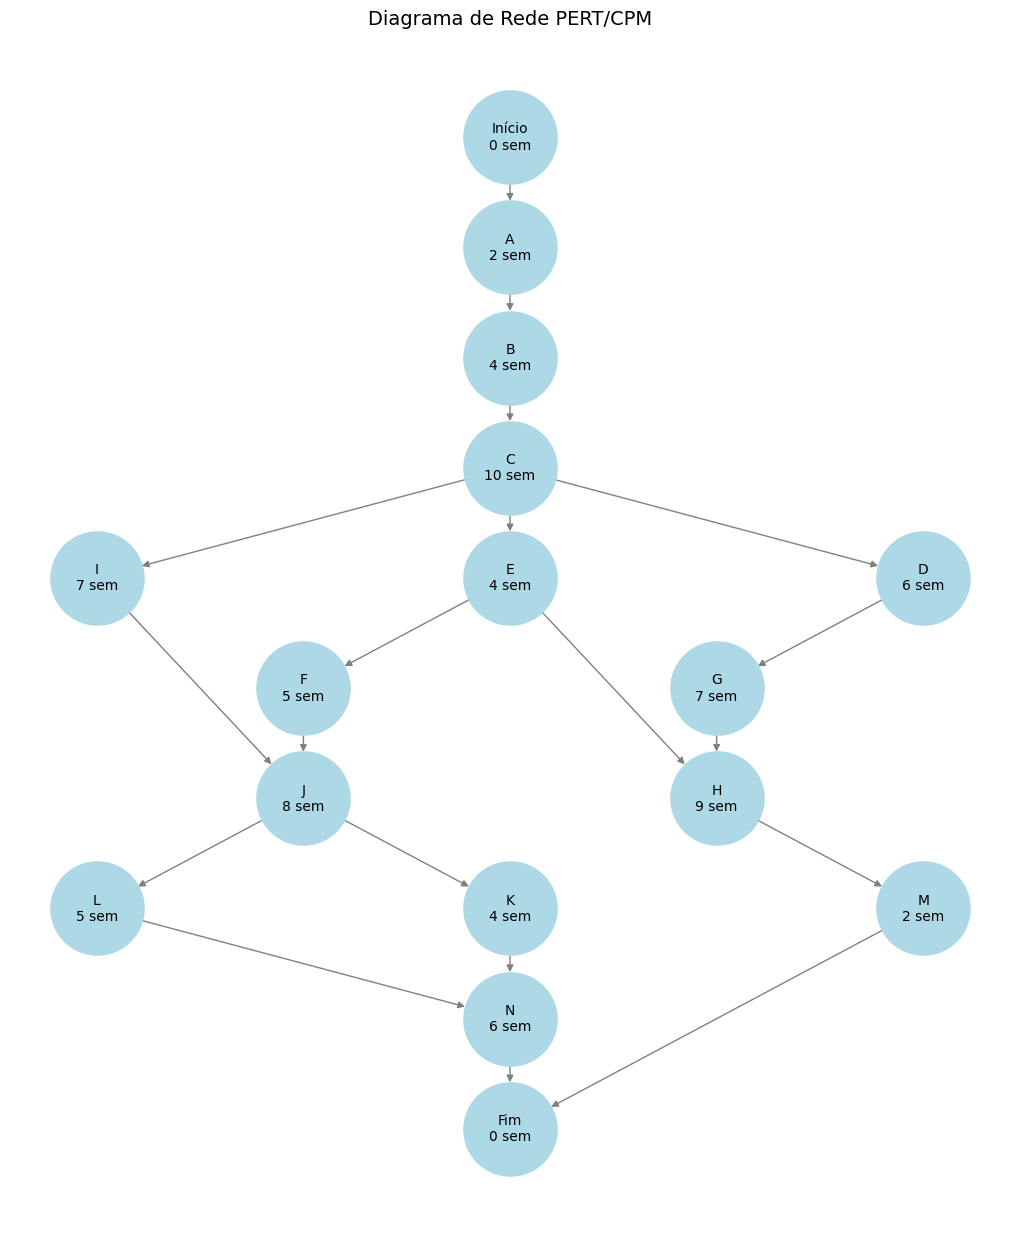

In [91]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualização dos dados
import networkx as nx  # Biblioteca para criar e manipular grafos (útil para criar o Diagrama de Rede PERT/CPM)
import pandas as pd  # Biblioteca para manipulação de dados em formato de tabelas (DataFrame)

# Exemplo de DataFrame contendo as informações do projeto
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],  # Identificadores das atividades
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],  # Descrição de cada atividade
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],  # Dependências entre atividades
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]  # Duração estimada para cada atividade
})

# Criar um grafo direcionado para modelar as atividades (Diagrama de Rede PERT/CPM)
G = nx.DiGraph()  # DiGraph (grafo direcionado) será usado para representar as dependências de atividades

# Adicionar nós e arestas ao grafo com base nos dados do DataFrame
for i, row in data.iterrows():  # Itera sobre as linhas do DataFrame para adicionar cada atividade
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])  # Adiciona cada atividade como um nó no grafo, com sua duração
    if row['Atividades Precedentes']:  # Verifica se a atividade tem predecessores
        precedentes = row['Atividades Precedentes'].split(',')  # Se houver mais de um, separa os predecessores por vírgula
        for p in precedentes:  # Para cada atividade predecessora
            G.add_edge(p.strip(), row['Atividade'])  # Adiciona uma aresta do predecessor para a atividade atual (representa a dependência)

# Função para calcular os níveis das atividades (hierarquia top-down)
def calculate_levels(graph):
    levels = {}  # Dicionário para armazenar o nível de cada atividade
    for node in nx.topological_sort(graph):  # Realiza uma ordenação topológica das atividades no grafo
        if len(list(graph.predecessors(node))) == 0:  # Se a atividade não tem predecessores (como o "Início")
            levels[node] = 0  # Atribui nível 0 para a atividade inicial
        else:
            # Para atividades com predecessores, atribui o nível máximo dos predecessores + 1
            levels[node] = max([levels[p] for p in graph.predecessors(node)]) + 1
    return levels  # Retorna o dicionário de níveis (profundidade hierárquica das atividades)

# Calcular os níveis das atividades no grafo
levels = calculate_levels(G)

# Atribuir os níveis calculados como atributos dos nós no grafo
nx.set_node_attributes(G, levels, "subset")  # Armazena os níveis como atributos dos nós no grafo

# Calcular o layout dos nós com espaçamento ajustado (invertendo os eixos para orientação vertical)
pos = nx.multipartite_layout(G, subset_key="subset")  # Usa o layout multipartite baseado no nível das atividades
vertical_spacing = 2.0  # Define o espaçamento vertical entre os níveis (maior número significa mais espaço entre as camadas)
horizontal_spacing = 2.0  # Define o espaçamento horizontal entre as atividades
for node in pos:  # Ajusta a posição de cada nó
    x, y = pos[node]  # Obtém as coordenadas x e y
    pos[node] = (y * horizontal_spacing, -x * vertical_spacing)  # Ajusta as coordenadas, invertendo e ampliando a separação entre os nós

# Melhorar a visualização do grafo
plt.figure(figsize=(10, 12))  # Define o tamanho da figura do gráfico, em polegadas (largura, altura)

# Desenhar o grafo com as configurações ajustadas
nx.draw(
    G,  # O grafo a ser desenhado
    pos,  # As posições calculadas dos nós
    with_labels=False,  # Desativa a exibição dos rótulos padrão (serão desenhados rótulos personalizados mais tarde)
    node_size=4500,  # Ajusta o tamanho dos nós para torná-los visíveis e legíveis
    node_color='lightblue',  # Define a cor de fundo dos nós (azul claro)
    edge_color='gray',  # Define a cor das arestas (linha entre os nós)
    arrowsize=10  # Ajusta o tamanho das setas nas arestas para indicar a direção
)

# Adicionar rótulos personalizados nos nós (Nome da Atividade e sua Duração Estimada)
labels = nx.get_node_attributes(G, 'duração')  # Obtém o atributo de duração de cada nó (atividade)
custom_labels = {n: f"{n}\n{d} sem" for n, d in labels.items()}  # Cria rótulos personalizados no formato "Atividade\nDuração sem"
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10)  # Desenha os rótulos personalizados nos nós

# Adicionar título ao gráfico
plt.title("Diagrama de Rede PERT/CPM", fontsize=14)  # Título do gráfico (diagramas PERT/CPM)

# Exibir o gráfico gerado
plt.show()  # Mostra o gráfico na tela


## Caminho crítico

A saída do código apresenta todos os caminhos possíveis entre o início e o fim de um projeto, com suas respectivas durações. Cada linha mostra uma sequência de atividades (caminho) e a soma total das durações das atividades ao longo desse caminho. O "caminho crítico" é o caminho com a maior duração total, o que implica que qualquer atraso em uma atividade desse caminho afetará diretamente a duração total do projeto. Nesse caso, o caminho crítico é o mais longo, pois não há atividades que podem ser atrasadas sem impactar o prazo final do projeto.

In [109]:
import pandas as pd
import networkx as nx

# Criar o grafo de PERT/CPM novamente com base nos dados anteriores
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Criar o grafo de PERT/CPM
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for i, row in data.iterrows():
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])
    if row['Atividades Precedentes']:
        precedentes = row['Atividades Precedentes'].split(',')
        for p in precedentes:
            G.add_edge(p.strip(), row['Atividade'])

# Função para encontrar todos os caminhos do início ao fim
def find_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)
    return paths

# Encontrar todos os caminhos do "Início" para "Fim"
all_paths = find_paths(G, 'Início', 'Fim')

# Calcular a duração de cada caminho
path_durations = []
for path in all_paths:
    duration = sum(G.nodes[node]['duração'] for node in path)
    path_durations.append((path, duration))

# Criar uma tabela com os caminhos e suas durações
paths_df = pd.DataFrame(path_durations, columns=['Caminho', 'Duração Total'])
paths_df['Caminho'] = paths_df['Caminho'].apply(lambda x: ' -> '.join(x))  # Formatar o caminho como uma string

# Ajustar para exibir as células com texto completo
pd.set_option('display.max_colwidth', None)  # Não limitar a largura das células

# Exibir a tabela de caminhos e durações
print(paths_df)


                                                 Caminho  Duração Total
0       Início -> A -> B -> C -> D -> G -> H -> M -> Fim             40
1  Início -> A -> B -> C -> E -> F -> J -> K -> N -> Fim             43
2  Início -> A -> B -> C -> E -> F -> J -> L -> N -> Fim             44
3            Início -> A -> B -> C -> E -> H -> M -> Fim             31
4       Início -> A -> B -> C -> I -> J -> K -> N -> Fim             41
5       Início -> A -> B -> C -> I -> J -> L -> N -> Fim             42


O código abaixo gera uma tabela com todos os caminhos possíveis de um projeto, desde o início até o fim, utilizando o Diagrama PERT/CPM. Cada caminho é exibido com sua respectiva duração total. O caminho crítico, ou seja, o caminho com a maior duração total, é destacado em vermelho. Para isso, o código identifica o caminho com a maior duração e aplica um estilo visual em HTML para colorir as atividades que fazem parte desse caminho. Embora a tabela mostre todos os caminhos, o caminho crítico é facilmente identificado devido ao destaque em vermelho, permitindo uma rápida visualização da sequência de atividades mais longa, o que é crucial para a gestão eficiente do tempo no projeto.

In [118]:

import pandas as pd
import networkx as nx

# Criar o grafo de PERT/CPM novamente com base nos dados anteriores
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Criar o grafo de PERT/CPM
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for i, row in data.iterrows():
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])
    if row['Atividades Precedentes']:
        precedentes = row['Atividades Precedentes'].split(',')
        for p in precedentes:
            G.add_edge(p.strip(), row['Atividade'])

# Função para encontrar todos os caminhos do início ao fim
def find_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)
    return paths

# Encontrar todos os caminhos do "Início" para "Fim"
all_paths = find_paths(G, 'Início', 'Fim')

# Calcular a duração de cada caminho
path_durations = []
for path in all_paths:
    duration = sum(G.nodes[node]['duração'] for node in path)
    path_durations.append((path, duration))

# Criar uma tabela com os caminhos e suas durações
paths_df = pd.DataFrame(path_durations, columns=['Caminho', 'Duração Total'])
paths_df['Caminho'] = paths_df['Caminho'].apply(lambda x: ' -> '.join(x))  # Formatar o caminho como uma string

# Encontrar o caminho crítico (o de maior duração)
critical_path = max(path_durations, key=lambda x: x[1])[0]

# Função para destacar o caminho crítico em vermelho
def highlight_critical(path):
    return ' -> '.join([f"<span style='color:red'>{node}</span>" if node in critical_path else node for node in path])

# Aplicar o destaque para o caminho crítico na tabela
paths_df['Caminho'] = paths_df['Caminho'].apply(lambda x: highlight_critical(x.split(' -> ')))

# Ajustar para exibir as células com texto completo
pd.set_option('display.max_colwidth', None)  # Não limitar a largura das células

# Exibir a tabela de caminhos e durações com destaque no caminho crítico
from IPython.core.display import display, HTML
display(HTML(paths_df.to_html(escape=False)))


C:\Users\DELL\AppData\Local\Temp\ipykernel_12112\3892950494.py:67: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


,Caminho,Duração Total
0,Início -> A -> B -> C -> D -> G -> H -> M -> Fim,40
1,Início -> A -> B -> C -> E -> F -> J -> K -> N -> Fim,43
2,Início -> A -> B -> C -> E -> F -> J -> L -> N -> Fim,44
3,Início -> A -> B -> C -> E -> H -> M -> Fim,31
4,Início -> A -> B -> C -> I -> J -> K -> N -> Fim,41
5,Início -> A -> B -> C -> I -> J -> L -> N -> Fim,42


## Representação do caminho crítico no grafo de rede

O código apresentado anteriormente foi assim modificado para destacar o **caminho crítico** no Diagrama de Rede PERT/CPM, onde as atividades e os arcos que fazem parte desse caminho são exibidos em vermelho. O **caminho crítico** é a sequência de atividades que determina o tempo total do projeto, ou seja, qualquer atraso em uma dessas atividades resultará em atraso no projeto como um todo. O código identifica esse caminho com base na duração de cada caminho do início ao fim e destaca as atividades e arestas que compõem o caminho crítico. Isso é feito ajustando a cor dos nós e das arestas do grafo durante a renderização, utilizando o **matplotlib** para visualização e **networkx** para manipulação do grafo. Além disso, o código também permite ajustar a aparência do grafo, como o tamanho dos nós, a cor das setas e a disposição das atividades no gráfico.

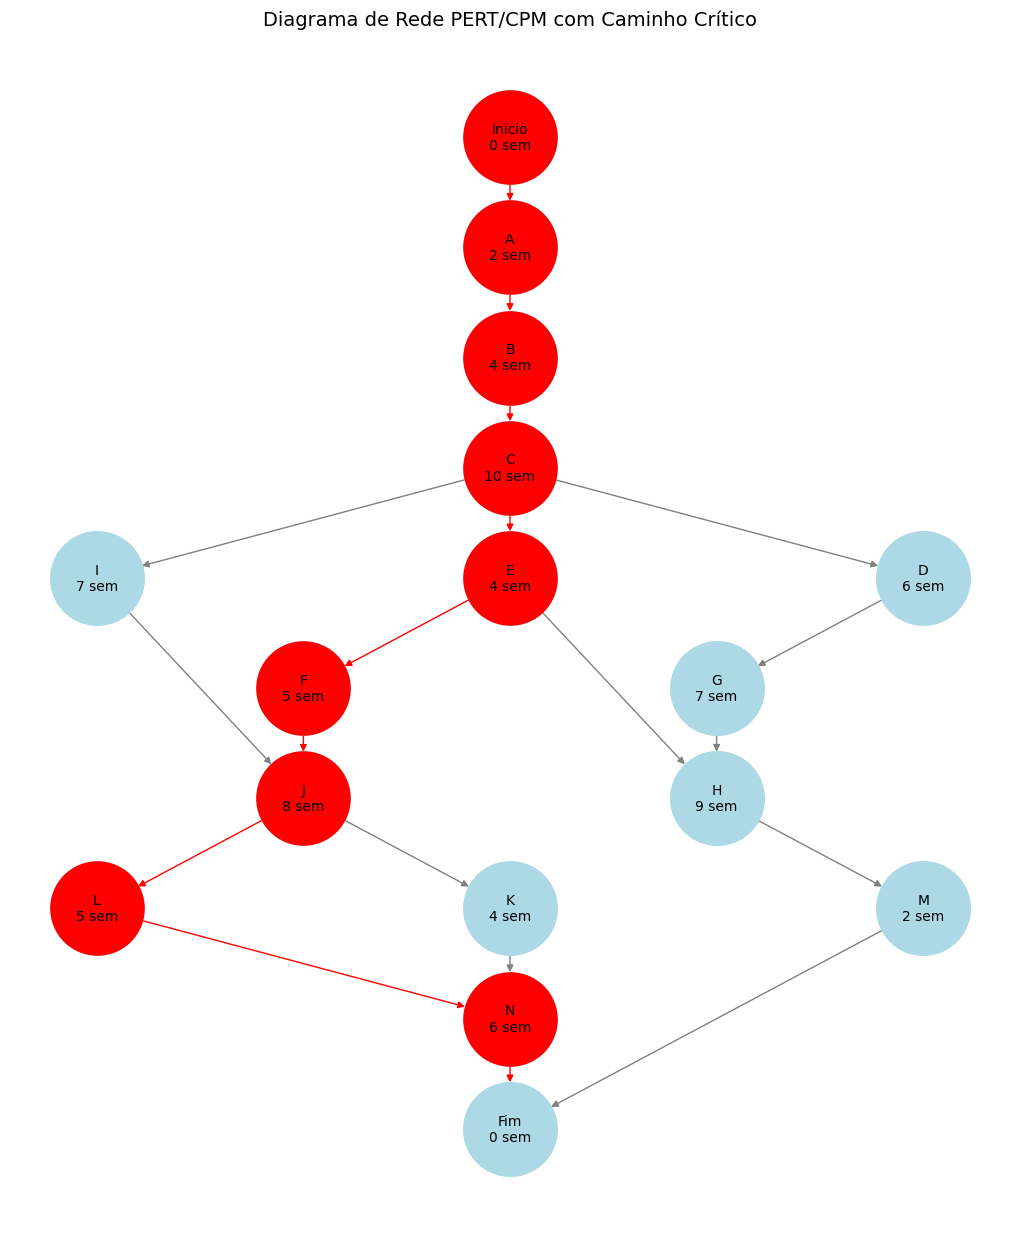

In [120]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Exemplo de DataFrame contendo as informações do projeto
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Criar o grafo de PERT/CPM
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for i, row in data.iterrows():
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])
    if row['Atividades Precedentes']:
        precedentes = row['Atividades Precedentes'].split(',')
        for p in precedentes:
            G.add_edge(p.strip(), row['Atividade'])

# Função para calcular os níveis das atividades (hierarquia top-down)
def calculate_levels(graph):
    levels = {}
    for node in nx.topological_sort(graph):
        if len(list(graph.predecessors(node))) == 0:
            levels[node] = 0
        else:
            levels[node] = max([levels[p] for p in graph.predecessors(node)]) + 1
    return levels

# Calcular os níveis das atividades
levels = calculate_levels(G)

# Atribuir os níveis como atributos aos nós
nx.set_node_attributes(G, levels, "subset")

# Função para encontrar todos os caminhos do início ao fim
def find_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)
    return paths

# Encontrar todos os caminhos do "Início" para "Fim"
all_paths = find_paths(G, 'Início', 'Fim')

# Calcular a duração de cada caminho
path_durations = []
for path in all_paths:
    duration = sum(G.nodes[node]['duração'] for node in path)
    path_durations.append((path, duration))

# Determinar o caminho crítico (o caminho mais longo)
max_duration = max(path_durations, key=lambda x: x[1])[1]
critical_paths = [path for path, duration in path_durations if duration == max_duration]

# Identificar os nodos e arestas do caminho crítico
critical_nodes = set()
critical_edges = set()

for path in critical_paths:
    for i in range(len(path) - 1):
        critical_nodes.add(path[i])
        critical_edges.add((path[i], path[i+1]))

# Calcular o layout dos nós
pos = nx.multipartite_layout(G, subset_key="subset")
vertical_spacing = 2.0
horizontal_spacing = 2.0
for node in pos:
    x, y = pos[node]
    pos[node] = (y * horizontal_spacing, -x * vertical_spacing)

# Visualização do grafo com caminho crítico em vermelho
plt.figure(figsize=(10, 12))

# Desenhar os arcos com cores diferentes para o caminho crítico
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=4500,
    node_color='lightblue',
    edge_color=['red' if edge in critical_edges else 'gray' for edge in G.edges()],
    arrowsize=10
)

# Desenhar os nós
nx.draw_networkx_nodes(G, pos, nodelist=critical_nodes, node_color='red', node_size=4500)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if node not in critical_nodes], node_color='lightblue', node_size=4500)

# Adicionar rótulos personalizados nos nós
labels = nx.get_node_attributes(G, 'duração')
custom_labels = {n: f"{n}\n{d} sem" for n, d in labels.items()}
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10)

# Título do gráfico
plt.title("Diagrama de Rede PERT/CPM com Caminho Crítico", fontsize=14)

# Exibir o gráfico
plt.show()
